## Assignment 1: Machine Learning Methods

### Dongju Ma A1942340

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset

In [39]:
od = pd.read_csv('./data/ObesityDataSet.csv')

### 2. Analyse and visualise the data

In [40]:
od

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [42]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [43]:
od.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [44]:
od.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [76]:
numeric_data = od.select_dtypes(include=[np.number])
categorical_data = od.select_dtypes(exclude=[np.number])

In [46]:
od.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

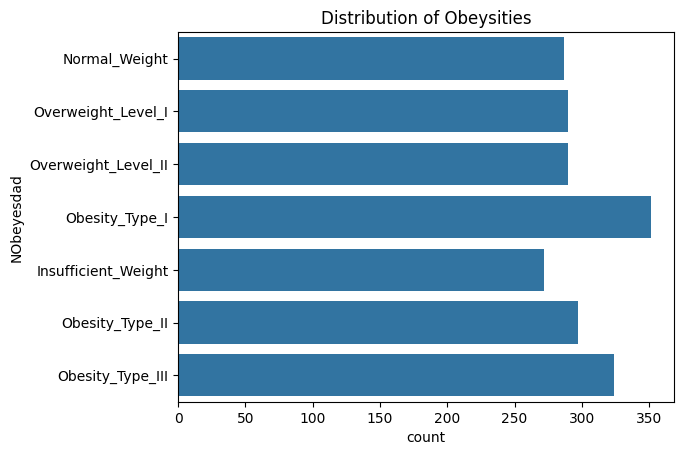

In [47]:
sns.countplot(od['NObeyesdad'])
plt.title("Distribution of Obeysities")
plt.show()

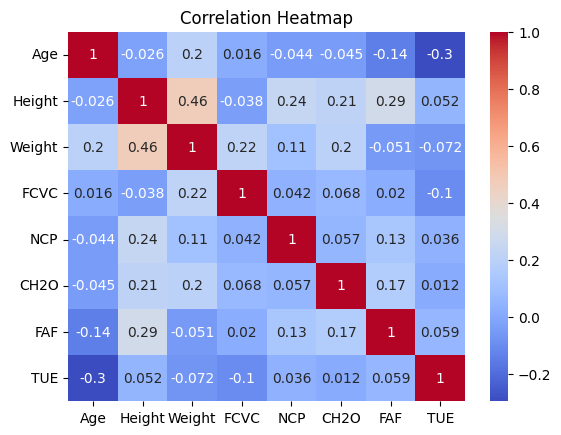

In [48]:
correlation_matrix = od[numeric_data.columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
def histogram_charts(data: pd.DataFrame, features, label_rotation=False):
    num_features = len(features)
    num_rows = (num_features + 2) // 3 
    num_cols = 3 
    
    plt.figure(figsize=(12, num_rows * 5)) 
    
    for i, feature in enumerate(features):
        row = i // num_cols 
        col = i % num_cols
        
        plt.subplot(num_rows, num_cols, row * num_cols + col + 1)

        sns.histplot(data[feature], kde=True, stat='density', bins=30, color='blue', edgecolor='black')
        
        plt.xlabel(f'{feature}')
        plt.ylabel(f'Density')
        if label_rotation:
            plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

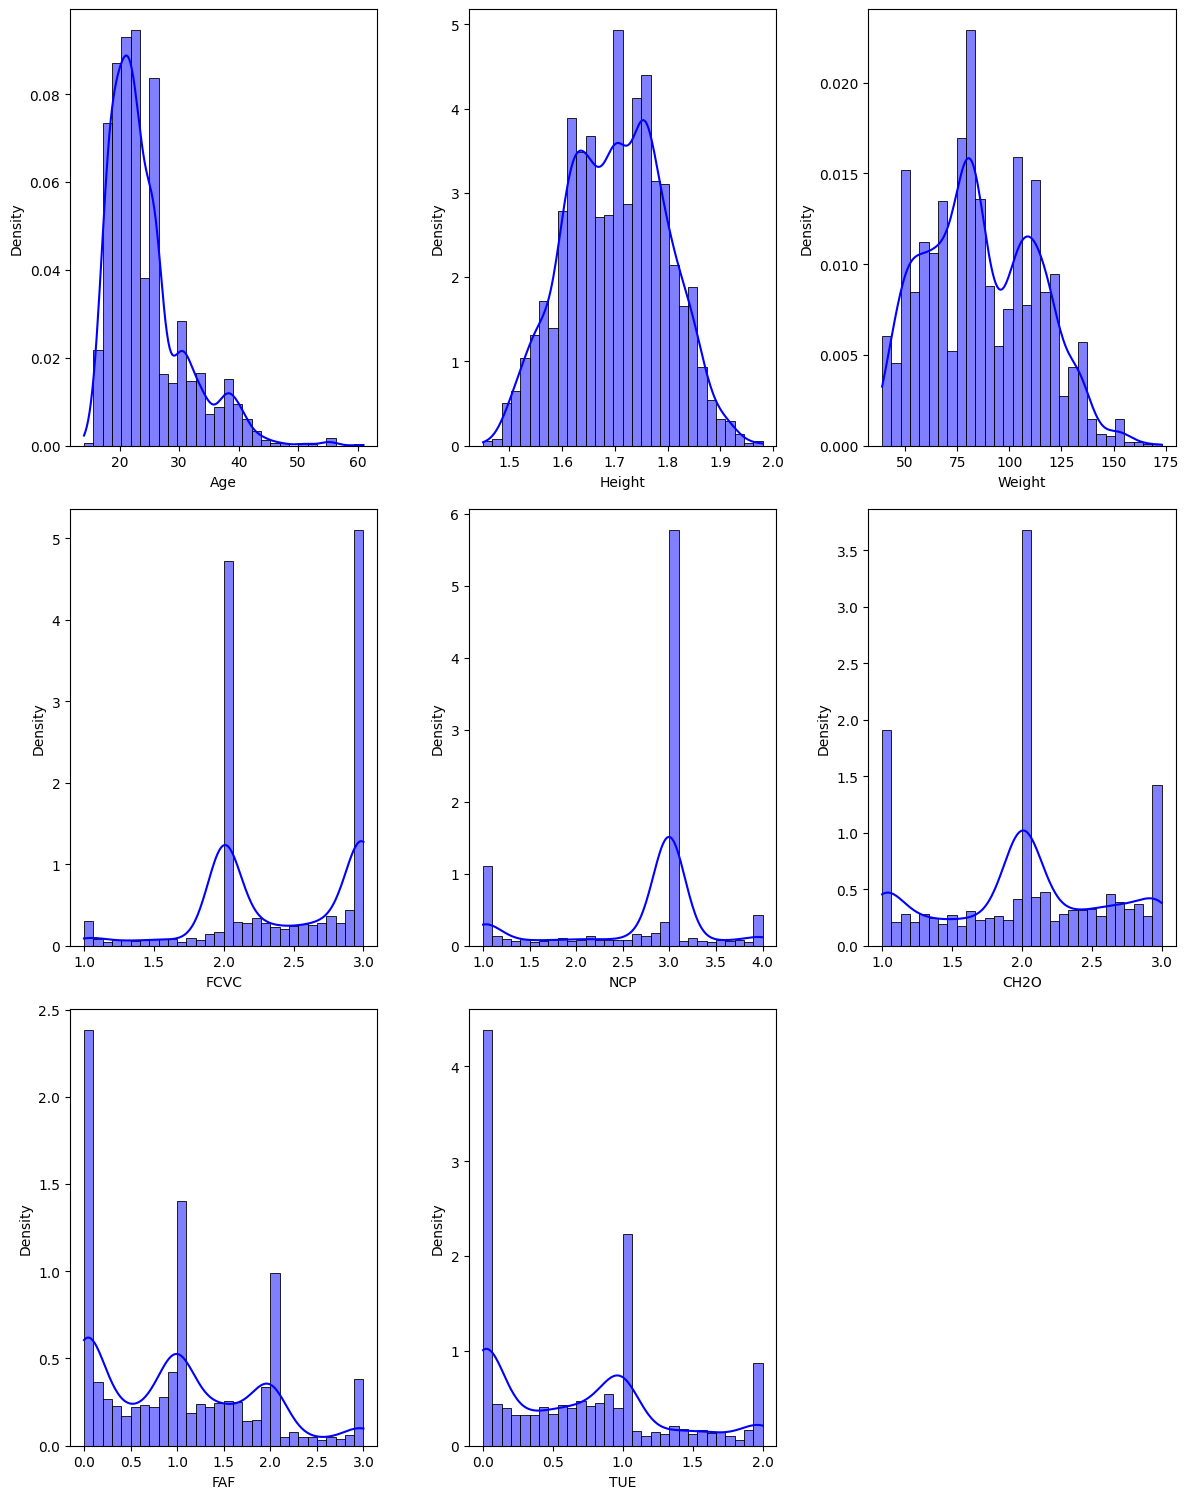

In [ ]:
histogram_charts(od, numeric_data)

In [51]:
def plot_charts(data, features, target='NObeyesdad', label_rotation=False):
    
    num_features = len(features)
    num_rows = (num_features * 2) // 2  
    num_cols = 2  
    
    plt.figure(figsize=(12, num_rows * 5))
    
    for i, feature in enumerate(features):
        feature_type = data[feature].dtype

        if feature not in data.columns:
            print(f"Warning: {feature} not found in dataset!")
            continue  
        
        plt.subplot(num_rows, num_cols, 2*i + 1)
        plt.title(f'Count Plot of {feature}')
        if feature_type == 'object':
            sns.countplot(y=data[feature], palette=("husl"))
        else:
            sns.barplot(x=data[feature], y=data[target], palette="husl")
        plt.xlabel(f'{feature}')
        plt.ylabel(f'Count of {feature}')
        if label_rotation:
            plt.xticks(rotation=90)
        
        plt.subplot(num_rows, num_cols, 2*i + 2)
        plt.title(f'{feature} vs {target}')
        sns.boxplot(x=data[feature], y=data[target], palette=("husl"))
        if label_rotation:
            plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()


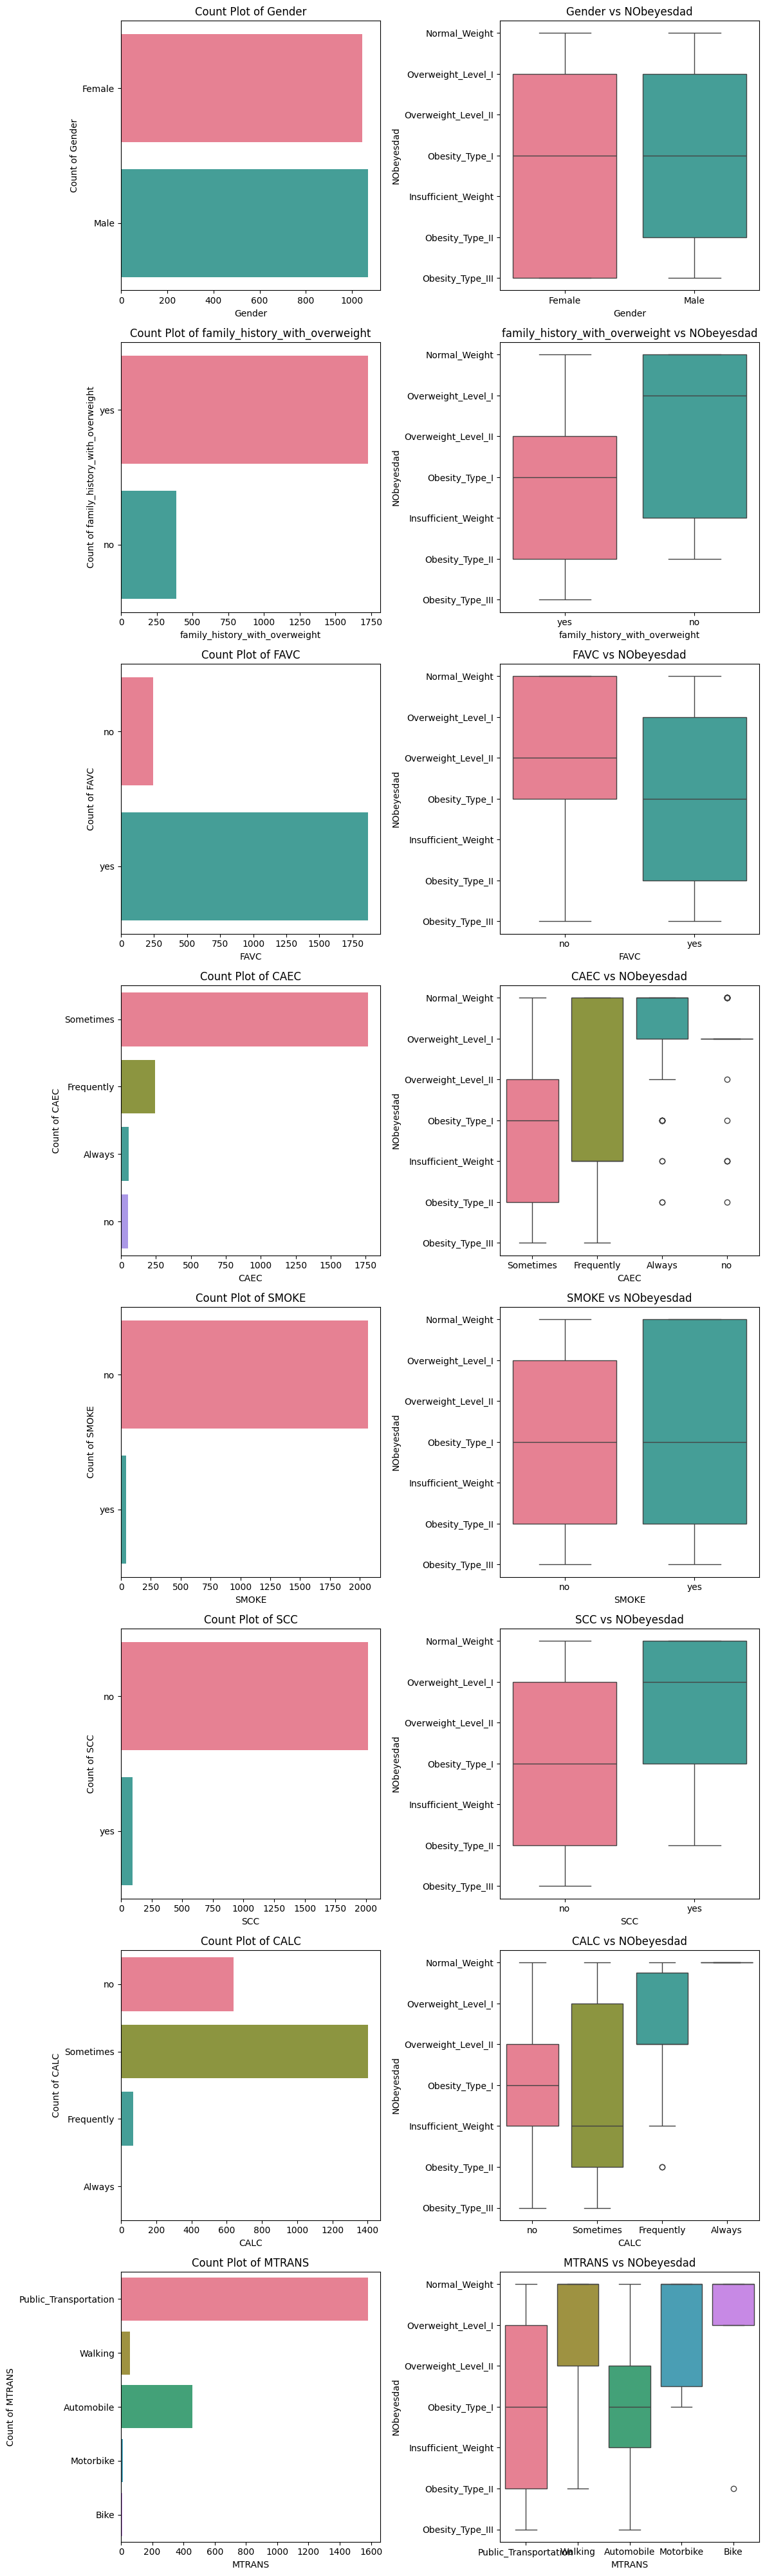

In [79]:
plot_charts(od, categorical_data.drop('NObeyesdad', axis=1))

### 3. Organise the data for modelling

In [ ]:
scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
od_scaled = pd.concat([scaled_numeric_data, categorical_data], axis=1)
od_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [56]:
od1 = pd.get_dummies(od_scaled.drop('NObeyesdad', axis=1), drop_first=False)
od1['NObeyesdad'] = od_scaled['NObeyesdad'].apply(lambda x: 1 if 'Obesity' in x else 0 )
od1

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,True,False,...,False,False,False,True,False,False,False,True,False,0
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,True,False,...,False,False,True,False,False,False,False,True,False,0
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,False,True,...,False,True,False,False,False,False,False,True,False,0
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,False,True,...,False,True,False,False,False,False,False,False,True,0
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,False,True,...,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,True,False,...,False,False,True,False,False,False,False,True,False,1
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,True,False,...,False,False,True,False,False,False,False,True,False,1
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,True,False,...,False,False,True,False,False,False,False,True,False,1
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,True,False,...,False,False,True,False,False,False,False,True,False,1


In [57]:
od1.shape

(2111, 32)

### 4. Implement prediction models

In [58]:
od_train, od_test = train_test_split(od1, train_size=0.7, test_size=0.3, random_state=1942340)
x_train, x_test = od_train.drop('NObeyesdad', axis=1), od_test.drop('NObeyesdad', axis=1)
y_train, y_test = od_train['NObeyesdad'], od_test['NObeyesdad']

In [59]:
log = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC(probability=True)

models = [log, rf, knn, svm]

### 5. Train prediction models

In [60]:
def training_models(models: list) -> pd.DataFrame:
    
    results = []
    
    for model in models:
        
        cv_scores = cross_validate(model, x_train, y_train, 
                            scoring=['accuracy','f1'], 
                            cv=5, return_train_score=True)
        
        model_name = model.__class__.__name__
        accuracy = cv_scores['test_accuracy'].mean()
        f1 = cv_scores['test_f1'].mean()
        
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'F1-score': f1,
        })
    
    return pd.DataFrame(results)

In [61]:
training_models(models)

,Model,Accuracy,F1-score
0,LogisticRegression,0.993232,0.992582
1,RandomForestClassifier,0.986454,0.985157
2,KNeighborsClassifier,0.951255,0.948566
3,SVC,0.991878,0.991127


### 6. Test prediction models and show results

In [ ]:
def testing_models(models: list) -> pd.DataFrame:
    results = []
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        model_name = model.__class__.__name__
        accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
        f1 = f1_score(y_pred=y_pred, y_true=y_test)
        y_proba = model.predict_proba(x_test)[:, 1] 
        roc_auc = roc_auc_score(y_test, y_proba)
    
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'F1-score': f1,
            'ROC_AUC': roc_auc
        })
    
    return pd.DataFrame(results)

testing_models(models)

,Model,Accuracy,F1-score,ROC_AUC
0,LogisticRegression,0.992114,0.991482,0.999610
1,RandomForestClassifier,0.982650,0.981067,0.997795
2,KNeighborsClassifier,0.951104,0.948760,0.990570
3,SVC,0.990536,0.989761,0.999230


### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

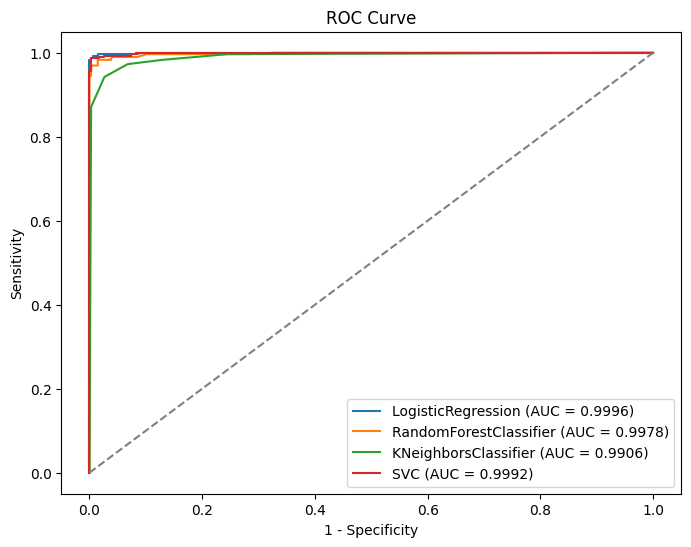

In [ ]:
plt.figure(figsize=(8, 6))

for model in models:
    y_scores = model.decision_function(x_test) if hasattr(model, "decision_function") else model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc_score:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.title("ROC Curve")
plt.legend()
plt.show()

### 8. Describe appropriate recommendations

In [ ]:
log.fit(x_train, y_train)
feature_importance = log.coef_[0]

feature_names = x_train.columns
importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [73]:
importance.sort_values(by='Importance', ascending=False)[importance['Importance'] > 0]

,Feature,Importance
2,Weight,9.089880
13,FAVC_yes,0.834529
16,CAEC_Sometimes,0.594281
8,Gender_Female,0.506082
28,MTRANS_Motorbike,0.459353
11,family_history_with_overweight_yes,0.277040
23,CALC_Frequently,0.267086
19,SMOKE_yes,0.241374
20,SCC_no,0.191400
5,CH2O,0.106410


In [75]:
importance.sort_values(by='Importance')[importance['Importance'] < 0]

,Feature,Importance
1,Height,-3.058812
12,FAVC_no,-0.894510
9,Gender_Male,-0.566063
15,CAEC_Frequently,-0.409947
17,CAEC_no,-0.350032
10,family_history_with_overweight_no,-0.337021
18,SMOKE_no,-0.301355
21,SCC_yes,-0.251381
30,MTRANS_Walking,-0.214892
24,CALC_Sometimes,-0.191225


### 9. Reflect on what you have learned by completing this assignment

### 10. References